# CA05-A - Logistic Regression

Cardiovascular Disease (CVD) kills more people than cancer globally. A dataset of real heart patients collected from a 15 year heart study cohort is made available for this assignment. The dataset has 16 patient features. Note that none of the features include any Blood Test information.

## Data Column (Feature Names) Descriptions

*   **cvd_4types**: Risk of Cardiovascular Disease. 0 - “No Risk”, 1 - “Risk Present” (Label Column)
*   **age_s1**: Age in Years
*   **race**: 1 - White, 2 - Black, 3 – Other
* **educat**: Education Level (Less than 10 years, 11-15, 16-20, 20>)
* **mstat**: Marital Status: 1- married, 2 - widowed, 3 - divorced/separated, 4 - never married, 8 - unknown/refused
* **hip**: Hip Circumference (in cm)
* **neck20**: Neck Circumference (in cm)
* **waist**: Waist Circumfrence (in cm)
* **av_weight_kg**: Average Weight (in kg)
* **cgpkyr**: Number of Cigarette Packs per Year
* **tea15**: Cups of Tea on a regular Day
* **srhype**: Self-reported Hypertension
* **parrptdiab**: History of Diabetes
* **bend25**: Health restricting activities such as bending, kneeling, or stooping: 1 - Yes, limited a lot, 2 - Yes, limited a little, 3 - No, not limited at all
* **happy25**: Happiness level in the past four weeks. Scale of 1-6
* **tired25**: Tiredness level in the past four weeks. Scale of 1-6
* **hlthlm25**: Social activities limited by health conditions in the past four weeks. Scale of 1-5 (decreasing)

Where 0 = No and 1 = Yes

The feature descriptions were obtained at: https://sleepdata.org/datasets/shhs/variables 

In [829]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [830]:
cvd = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [831]:
cvd.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [832]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


## 1. Binary Classifier Model

A binary classifier model is built to predict the risk of CVD using a logstic  model. 

In [833]:
# Selecting the feature variables
feature_cols = cvd.drop(['cvd_4types'], axis=1)

X = feature_cols # Features
y = cvd.cvd_4types # Target variable

In [834]:
# Splitting the Dataset into 75% train and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=0)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [835]:
# Standardizing training data by scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [836]:
# Fit (train) the Logistic Regression Classifier using standardized training data
logreg = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

logreg.fit(X_train, y_train)
#logreg.fit(X_train/np.std(X_train,0), y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [837]:
# Making prediction using testing data
y_pred = logreg.predict(X_test)

## 2. Feature Importance

Displaying the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk.

In [838]:
# Retrieving coefficients
# The higher the coefficient, the larger the influence of its corresponding feature on the outcome
logreg.coef_

# Storing coefficients in dictionary with feature names
coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],feature_cols):
    coef_dict[feat] = coef

# storing result in DataFrame including signs to show positive or negative influence
coef = pd.DataFrame.from_dict(coef_dict,orient='index', columns=['coefficient'])
coef

,coefficient
age_s1,0.062507
race,-0.300312
educat,0.148928
mstat,-0.121174
hip,-0.300070
neck20,-0.038384
waist,0.631839
av_weight_kg,-0.115230
cgpkyr,0.012234
tea15,-0.051947


In [839]:
# Obtaining coefficient's absolute value identify features' influence
abs(coef).sort_values(by='coefficient', ascending=False)

,coefficient
waist,0.631839
race,0.300312
hip,0.300070
hlthlm25,0.288335
educat,0.148928
parrptdiab,0.122615
mstat,0.121174
av_weight_kg,0.115230
tired25,0.092680
happy25,0.073534


## 3. Model Evaluation
Evaluating the performance of the model (including ROC Curve), explaining the performance and drawing a meaningful conclusion.

Model performance will be measured by:
* Confusion Matrix (TP, TN, FP, FN ... etc.)
* Accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph)

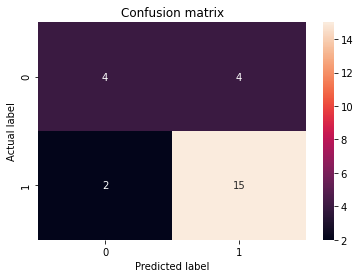

True Positives: 15
False Positives: 4
True Negatives: 4
False Negatives: 2


In [840]:
# Confusion Matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

In [841]:
# Classification report
print(classification_report(y_test, y_pred, digits=4))

# Precision = ratio of true positive predictions vs total predicted positives
# Recall = ratio of true positive predictions vs total actual positives
# F1-score = measures balance between precision and recall for accuracy

# The model predicted 15 true positives out of 17 total positives. 
# In this case, we care more about the ability to predict true positives as the objective is to detect heart disease.

              precision    recall  f1-score   support

           0     0.6667    0.5000    0.5714         8
           1     0.7895    0.8824    0.8333        17

    accuracy                         0.7600        25
   macro avg     0.7281    0.6912    0.7024        25
weighted avg     0.7502    0.7600    0.7495        25



In [849]:
# Sensitivity and Specificity
sensitivity = tp/(tp+fn) # ability to predict positive outcomes
specificity = tn/(tn+fp) # ability to predict negative outcomes

print('Sensitivity: ', sensitivity, '\nSpecificity: ', specificity)

Sensitivity:  0.8823529411764706 
Specificity:  0.5


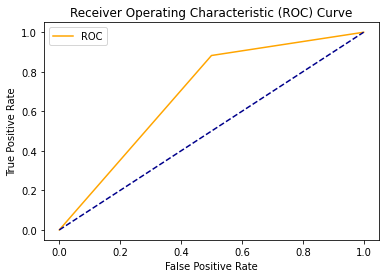

In [842]:
# ROC curve

# definiting plot
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# defining inputs and plotting graph
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [843]:
# AUC score
print("AUC Score: ", roc_auc_score(y_test, y_pred))

AUC Score:  0.6911764705882353
